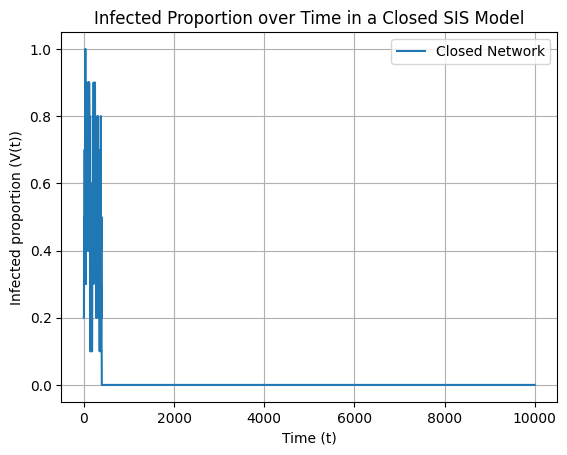

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
delta_bar = 0.1  # Recovery rate
beta_bar = 0.2  # Infection rate base
t_max = 10000  # Simulation time
dt = 0.01  # Time step
initial_population = 10
infected_ratio = 0.2  # Initial infected ratio

# Seed for reproducibility
np.random.seed(42)

# Initial conditions
infected = int(initial_population * infected_ratio)
V_closed = np.zeros(int(t_max / dt))  # Placeholder for the aggregate function V over time

for t in range(len(V_closed)):
    recoveries = np.random.binomial(infected, delta_bar * dt)
    new_infections = np.random.binomial(initial_population - infected, beta_bar * infected / initial_population * dt)

    infected = max(0, infected + new_infections - recoveries)
    V_closed[t] = infected / initial_population if initial_population > 0 else 0

# Plotting the result 
plt.plot(np.arange(0, t_max, dt), V_closed, label='Closed Network')
plt.xlabel('Time (t)')
plt.ylabel('Infected proportion (V(t))')
plt.title('One Instance of Infected Proportion over Time in a Closed SIS Model')
plt.grid(True)
plt.legend()
plt.show()

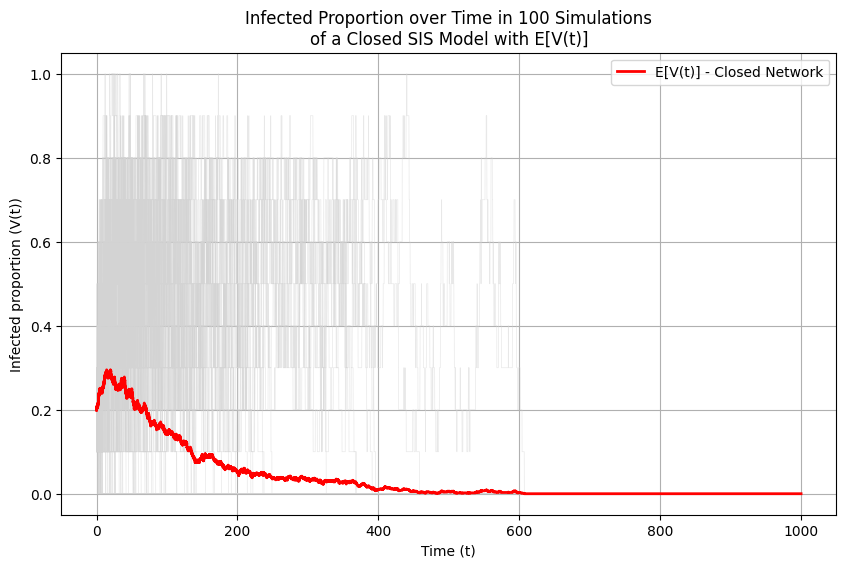

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
delta_bar = 0.1  # Recovery rate
beta_bar = 0.2  # Infection rate base
t_max = 1000  # Simulation max time for visibility
dt = 0.01  # Time step
initial_population = 10
infected_ratio = 0.2  # Initial infected ratio
num_runs = 100  # Number of simulation runs

# Seed for reproducibility
np.random.seed(42)

# Initialize the plot
plt.figure(figsize=(10, 6))
V_accumulated = np.zeros(int(t_max / dt))

for run in range(num_runs):
    infected = int(initial_population * infected_ratio)
    V_run = np.zeros(int(t_max / dt))  # V for each run
    
    for t in range(len(V_run)):
        recoveries = np.random.binomial(infected, delta_bar * dt)
        new_infections = np.random.binomial(initial_population - infected, beta_bar * infected / initial_population * dt)

        infected = max(0, infected + new_infections - recoveries)
        V_run[t] = infected / initial_population

    # Accumulate the infected proportion for averaging
    V_accumulated += V_run
    
    # Plot simulation run in light gray
    plt.plot(np.arange(0, t_max, dt), V_run, color='lightgray', linewidth=0.5, alpha=0.5)

# Calculate the average infected proportion over all runs
V_avg = V_accumulated / num_runs

# Plot the average infected proportion as a bold red line
plt.plot(np.arange(0, t_max, dt), V_avg, color='red', linewidth=2, label='E[V(t)] - Closed Network')

plt.xlabel('Time (t)')
plt.ylabel('Infected proportion (V(t))')
plt.title('Infected Proportion over Time in 100 Simulations\nof a Closed SIS Model with E[V(t)]')
plt.legend()
plt.grid(True)
plt.show()

# Network Construction (generate_network):

This function generates a connected Watts-Strogatz graph, which is a type of small-world network, using the NetworkX library.
The parameters num_nodes and avg_degree determine the size and average degree of the generated graph, respectively.
Model Dynamics (SIS_dynamics):

This function simulates the dynamics of the SIS model on the provided network.
It takes the adjacency matrix of the network, infection rate (beta), recovery rate (delta), initial state (initial infection probabilities for each node), and number of time steps as input.
It iteratively updates the infection probabilities of each node over time based on the SIS model equations.
Stability Analysis (is_stable):

This function checks the stability of the SIS model based on the provided network and parameters.
It computes the eigenvalues of the matrix (beta * adjacency_matrix - delta * identity_matrix) and checks if the condition for stability (equation 2) is satisfied.
Lyapunov Function (lyapunov_function):

This function calculates the Lyapunov function for the given states of the SIS model over time.
It computes the mean of the squared Euclidean norms of the states at each time step.
Upper Bounds (lyapunov_upper_bound):

This function computes the upper bounds for the Lyapunov function over time based on the stability condition and initial Lyapunov function value.
It uses equation 8 to calculate the upper bound.
Simulation and Visualization (visualize_simulation):

This function visualizes the simulation results of the SIS model.
It plots the infection probabilities of nodes over time.
Parameter Sensitivity Analysis (sensitivity_analysis):

This function is a placeholder for conducting sensitivity analysis by varying parameters like beta and delta and observing their effects on stability and dynamics.
Validation (validate):

This function is a placeholder for validating the results of the simulation by comparing them with theoretical expectations and literature.
In the example usage section:

A Watts-Strogatz graph is generated with 50 nodes and an average degree of 4.
The SIS dynamics are simulated on the generated network with given parameters (beta = 0.3, delta = 0.1).
Stability is checked using the is_stable function.
The Lyapunov function value and upper bound are computed.
The simulation results are visualized.
Overall, this code provides a framework for simulating and analyzing the SIS model on closed networks, including stability analysis and visualization of simulation results.

Is system stable? True
Lyapunov function value: 41.5922365595439
Upper bound of Lyapunov function: 265.8855891625465


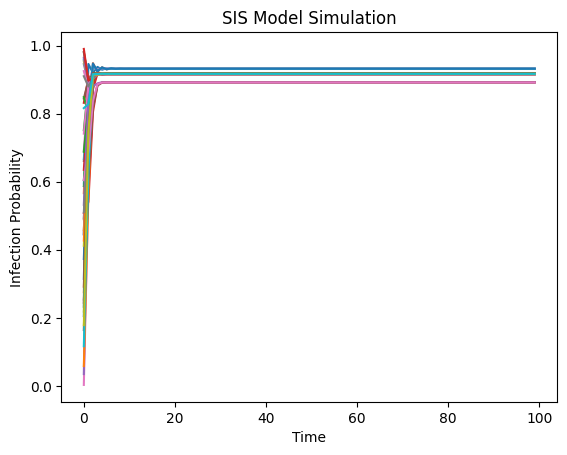

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Network Construction
def generate_network(num_nodes, avg_degree):
    G = nx.connected_watts_strogatz_graph(num_nodes, avg_degree, 0.1)
    return G

# Step 2: Model Dynamics
def SIS_dynamics(adj_matrix, beta, delta, initial_state, num_steps):
    n = adj_matrix.shape[0]
    states = np.zeros((num_steps, n))
    states[0] = initial_state
    for t in range(1, num_steps):
        infected_term = beta * np.dot(adj_matrix, states[t-1])
        recovery_term = delta * states[t-1]
        new_infections = infected_term * (1 - states[t-1])
        recoveries = recovery_term
        states[t] = states[t-1] + new_infections - recoveries
    return states

# Step 3: Stability Analysis
def is_stable(adj_matrix, beta, delta):
    eig_vals = np.linalg.eigvalsh(beta * adj_matrix - delta * np.eye(adj_matrix.shape[0]))
    return eig_vals[0] / beta / delta < 1

# Step 4: Lyapunov Function
def lyapunov_function(states):
    return np.mean(np.linalg.norm(states, axis=1)**2)

# Step 5: Upper Bounds
def lyapunov_upper_bound(beta, delta, lambda_max, initial_lyapunov, time):
    return initial_lyapunov + 2 * (beta * lambda_max - delta) * time

# Step 6: Simulation and Visualization
def visualize_simulation(states):
    plt.plot(states)
    plt.xlabel('Time')
    plt.ylabel('Infection Probability')
    plt.title('SIS Model Simulation')
    plt.show()

# # Step 7: Parameter Sensitivity Analysis
# def sensitivity_analysis():
#     # Vary beta and delta, observe the stability and dynamics

# # Step 8: Validation
# def validate():
#     # Compare results with theoretical expectations and literature

# Example usage
num_nodes = 50
avg_degree = 4
G = generate_network(num_nodes, avg_degree)
adj_matrix = nx.to_numpy_array(G)

beta = 0.3
delta = 0.1
initial_state = np.random.rand(num_nodes)
num_steps = 100

# Run model dynamics
states = SIS_dynamics(adj_matrix, beta, delta, initial_state, num_steps)

# Check stability
print("Is system stable?", is_stable(adj_matrix, beta, delta))

# Compute Lyapunov function
lyapunov_val = lyapunov_function(states)
print("Lyapunov function value:", lyapunov_val)

# Compute upper bounds
lambda_max = np.max(np.linalg.eigvalsh(adj_matrix))
time = num_steps
upper_bound = lyapunov_upper_bound(beta, delta, lambda_max, lyapunov_val, time)
print("Upper bound of Lyapunov function:", upper_bound)

# Visualize simulation
visualize_simulation(states)


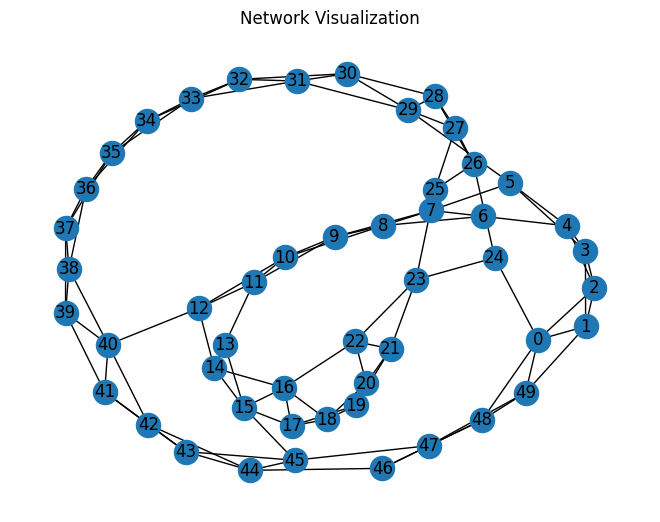

In [5]:
nx.draw(G, with_labels=True)
plt.title('Network Visualization')
plt.show()